# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Métodos paramétricos de estimación

## Estimación Lineal por mínimos cuadráticos (LS)

Técnica para encontrar modelos lineales que se representan como algún parámetro desconocido $\theta$ (Estimador). Recordar que $y[1], ... , y[N]$ son mediciones de la función que queremos estimar (variables dependientes). Existe otra secuencia denominada el vector de regresión $\phi[0], ... ,\phi[N]$, las cuales se reconocen como las entradas del modelo o variables independientes (vector de regresión). Un modelo lineal de predicción que incluye errores está dado por la siguiente relación:

$$y[k] = \phi[k]^T\theta + \varepsilon[k]$$

Inicialmente consideremos el error como 0, $y[k] = \phi[k]^T\theta$. La idea de LLS es minimizar el valor de error entre las mediciones $y[k]$ y sus valores estimados $\theta$ elevados al cuadrado, por tanto la función de costo a minimizar sería:

$$\sum_{k=1}^{N}[y[k]-\phi[k]^T\theta]^2$$

Asumamos $y[k]$ como $y$, $\phi[k]$ como $\phi$. El estimador $\theta$ es el valor que minimiza la función de costo.

Matricialmente la expresión de la función de costo que llamaremos $f[\theta]$ será:

$$f[\theta] = \frac{1}{2}|y - \phi^T\theta|^2$$

Omitiendo los subindices N y la notación vectorial, esta ecuación matricial se puede minimizar y evaluar mediante el cálculo del gradiente y la matriz Hessiana.

$$f[\theta] = \frac{1}{2}|y^T.y - 2.\phi^T.y.\theta + \phi^T.\phi.\theta^2|$$

Calculando el gradiende tendríamos:

$$\bigtriangledown f[\theta] = \bigtriangledown[\frac{1}{2}|y^T.y - 2.\phi^T.y.\theta + \phi^T.\phi.\theta^2|] = - \phi^T.y + \phi^T.\phi.\theta = 0$$

Despejando el estimador:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

Se define aquí la matriz pseudoinversa de Moore-Penrose así:

$$\phi^+ = [\phi^T.\phi]^{-1}$$

## Ejemplo 1 (LS) - Vector de regresión unitario

Asumamos un modelo constante con las siguientes condiciones:

$$y[k] = \phi[k]^T\theta + \varepsilon[k]$$

Si $\phi$ es unitario el modelo se reduce a:

$$y[k] = \theta + \varepsilon[k]$$

Ahora se debe encontrar el mejor estimador $\theta$ teniendo en cuenta lo siguiente:

$y = \begin{bmatrix}y[1]\\y[2]\\...\\y[N]\end{bmatrix}$, Según el modelo asumido, el vector de regresión estaría dado por: $\phi = \begin{bmatrix}1\\1\\...\\1\end{bmatrix}$. Las dimensiones de estos vectores es de Nx1.

Es relativamente sencillo calcular el mejor estimador usando la relación obtenida anteriormente:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

$$\phi^T.\phi = \begin{bmatrix}1&1&...&1\end{bmatrix}\begin{bmatrix}1\\1\\...\\1\end{bmatrix} = N$$

Y por consiguiente:

$$[\phi^T.\phi]^{-1}=\frac{1}{N}$$

Ahora observemos la expresión:
$$\phi^T.y = \begin{bmatrix}1&1&...&1\end{bmatrix}\begin{bmatrix}y[1]\\y[2]\\...\\y[N]\end{bmatrix} = \sum_{k=1}^{N}y[k]$$

Entonces armando el estimador, se tiene que con un vector de regresión unitario, el modelo estimado es un promedio:

$$\theta = \frac{1}{N}\sum_{k=1}^{N}y[k]$$

## Ejemplo 2 (LS) - Estimación de resistencia por LS

Asumamos un modelo constante con las siguientes condiciones: $y[k] = V[k]$, $\phi[k] = I[k]$, $\theta = R$.

Asumiendo que el mejor estimador es el siguiente:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

$$\phi^T.\phi = \begin{bmatrix}I[1]&I[2]&...&I[N]\end{bmatrix}\begin{bmatrix}I[1]\\I[2]\\...\\I[N]\end{bmatrix} = \sum_{k=1}^{N}I[k]^2$$

Por tanto el inverso de esta expresión sería:

$$[\phi^T.\phi]^{-1} = \frac{1}{\sum_{k=1}^{N}I[k]^2}$$

Por último se tiene que 

$$\phi^T.y = \begin{bmatrix}I[1]&I[2]&...&I[N]\end{bmatrix}\begin{bmatrix}V[1]\\V[2]\\...\\V[N]\end{bmatrix} = \sum_{k=1}^{N}I[k]V[k]$$

Finalmente:

$$\theta = \frac{\frac{1}{N}\sum_{k=1}^{N}I[k]V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]^2}$$

Modelo previamente obtenido en las clases anteriores.

## Ejemplo 3 (LS) - Estimación asumiendo un modelo lineal

Asumamos un modelo lineal con las siguientes condiciones: $y[k] = \theta_1 + \theta_2.x[k]$. Para ejemplificar un poco se podría tomar un movimiento uniformemente acelerado así: $v_f[k] = a.t[k]+v_0$, entendiendo $y = v_f$, el vector $\phi[k] = 1 + t[k]$ y $\theta = \begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}$.

Asumiendo que el mejor estimador es el siguiente:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

Y donde el vector de estimador debería tener la siguiente forma, según el modelo esperado:

$$\phi = \begin{bmatrix}1 & t[1]\\1 & t[2]\\...&...\\1 & t[N]\end{bmatrix}$$

Se espera que en este caso el vector de estimación sea:

$$\theta = \begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}$$

Por último se tiene que 

$$\phi^T.\phi = \begin{bmatrix}1&1&...&1\\t[1]&t[2]&...&t[N]\end{bmatrix}\begin{bmatrix}1 & t[1]\\1 & t[2]\\...&...\\1 & t[N]\end{bmatrix} = \begin{bmatrix}
N&\sum_{k=1}^{N}t[n]\\\sum_{k=1}^{N}t[n]&\sum_{k=1}^{N}t[n]^2 
\end{bmatrix}$$

El cálculo de la inversa de $\phi^T.\phi$, puede realizarse con la utilización de software apropiado. Finalmente la expresión:

$$\phi^T.y = \begin{bmatrix}1&1&...&1\\t[1]&t[2]&...&t[N]\end{bmatrix}\begin{bmatrix}v_f[1]\\v_f[2]\\...\\v_f[N]\end{bmatrix}=\begin{bmatrix}\sum_{k=1}^{N}v_f[n]\\\sum_{k=1}^{N}t[n]v_f[n]\end{bmatrix} $$

Por último el vector de estimaciones sería:

$$\theta = \begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}=[\phi^T.\phi]^{-1}.\phi^T.y = \begin{bmatrix}
N&\sum_{k=1}^{N}t[n]\\\sum_{k=1}^{N}t[n]&\sum_{k=1}^{N}t[n]^2 
\end{bmatrix}^{-1}\begin{bmatrix}\sum_{k=1}^{N}v_f[n]\\\sum_{k=1}^{N}t[n]v_f[n]\end{bmatrix}$$

<AxesSubplot: xlabel='t', ylabel='vf'>

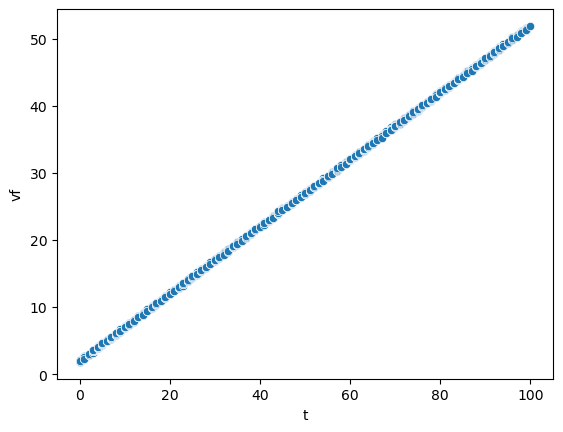

In [21]:
# Estimador Lineal para la recta y = 0.5x-2
N = 1000
t = np.linspace(0,100,N,dtype = "int")
teta1 = 2;
teta2 = 0.5
#teta3 = 1
#vf = (teta3*(t**2)+teta2*t+teta1) + np.random.normal(0,0.1,size=N)
vf = (teta2*t+teta1) + np.random.normal(0,0.1,size=N)
data = pd.DataFrame(data = {'t':t,'vf':vf})
data['ones'] = 1
sns.scatterplot(data,x = 't',y = 'vf')

In [22]:
#Calculando la matriz Moore - Penrose
#phi = np.array([data.ones, data.t, data.t**2]).transpose()
phi = np.array([data.ones, data.t]).transpose()
A = np.dot(phi.transpose(),phi)
Mpr = np.linalg.inv(A)
Mpr

array([[ 3.94036000e-03, -5.94000121e-05],
       [-5.94000121e-05,  1.19997600e-06]])

In [23]:
#Obteniendo la matriz de estimadores
B = np.dot(phi.transpose(),vf)
theta = np.dot(Mpr,B)
theta

array([1.99558023, 0.50010227])

## [Ejercicio en Clase](ejercicio_02.ipynb)